![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

Help the fitness studio explore interest in workouts at a global and national level.

- When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

- Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

- What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

- You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

In [52]:
# Question 1
workout_df = pd.read_csv('./data/workout.csv')
workout_df.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [4]:
workout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [53]:
peak = workout_df.loc[workout_df['workout_worldwide'].argmax(), :]
peak

month                2020-04
workout_worldwide        100
Name: 25, dtype: object

In [62]:
year = peak.iloc[0][:4]
year

'2020'

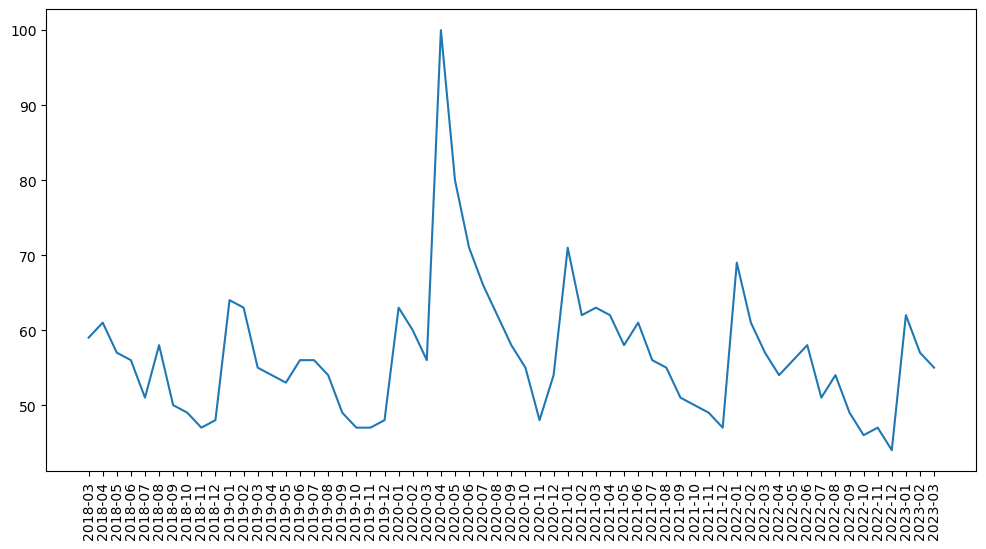

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(workout_df["month"], workout_df["workout_worldwide"])
plt.xticks(rotation=90)
plt.show()

### Question 2

In [66]:
# Question 2
keyword_df = pd.read_csv('./data/three_keywords.csv')
keyword_df

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9
...,...,...,...,...
56,2022-11,11,18,12
57,2022-12,11,16,11
58,2023-01,17,22,15
59,2023-02,14,21,12


In [84]:
covid_time = keyword_df[keyword_df['month'].between('2019', '2021')]

columns_dict = {"home_workout_worldwide": 0,
                "gym_workout_worldwide": 0,
                "home_gym_worldwide": 0}

for key, _ in columns_dict.items():
    max_idx = covid_time[key].idxmax()
    columns_dict[key] = covid_time.loc[max_idx, key]

columns_dict


{'home_workout_worldwide': 82,
 'gym_workout_worldwide': 21,
 'home_gym_worldwide': 34}

In [87]:
# Znajdź klucz z największą wartością
max_key = max(columns_dict, key=columns_dict.get)

print(f"Największa wartość występuje w kategorii: {max_key} ({columns_dict[max_key]})")


Największa wartość występuje w kategorii: home_workout_worldwide (82)


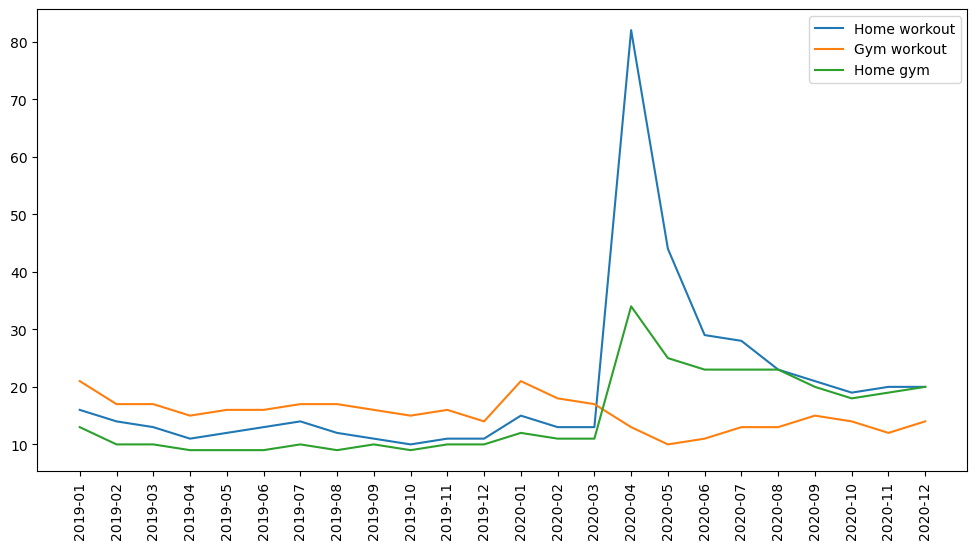

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(covid_time["month"], covid_time["home_workout_worldwide"], label="Home workout")
plt.plot(covid_time["month"], covid_time["gym_workout_worldwide"], label="Gym workout")
plt.plot(covid_time["month"], covid_time["home_gym_worldwide"], label="Home gym")
plt.xticks(rotation=90)
plt.legend()

### Question 3

In [101]:
geo_df = pd.read_csv('./data/workout_geo.csv')
geo_df.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [104]:
geo_df[geo_df['country'].str.contains('United', na=False)]
# geo_df[geo_df['country'].str.contains('Australia', na=False)]
# geo_df[geo_df['country'].str.contains('Japan', na=False)]

,country,workout_2018_2023
5,United States,100.0
36,United Kingdom,66.0
47,United Arab Emirates,56.0


In [114]:
countries = ['United States', 'Australia', 'Japan']
geo_with_three_countries = geo_df[geo_df['country'].isin(countries)]
geo_with_three_countries

,country,workout_2018_2023
5,United States,100.0
18,Australia,77.0
216,Japan,1.0


In [117]:
print(f"Country with the highest interest for workouts: {geo_with_three_countries.max().iloc[0]}")

Country with the highest interest for workouts: United States


### Question 4

In [118]:
home_workout_df = pd.read_csv('./data/three_keywords_geo.csv')
home_workout_df.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [119]:
home_workout_df_with_two_countries = home_workout_df[home_workout_df['Country'].isin(['Philippines', 'Malaysia'])]
home_workout_df_with_two_countries

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
23,Philippines,52.0,38.0,10.0
61,Malaysia,47.0,38.0,15.0


In [130]:
max_interest = home_workout_df_with_two_countries.loc[:, ['Country','home_workout_2018_2023']].sort_values(by='home_workout_2018_2023', ascending=False)
max_interest

,Country,home_workout_2018_2023
23,Philippines,52.0
61,Malaysia,47.0


In [143]:
print(f"The highest interest in home workouts {max_interest.head(1).loc[:, 'Country'].values[0]}")

The highest interest in home workouts Philippines


# Solution

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Find the peak for global 'workout' searches
df_workout = pd.read_csv("data/workout.csv")

plt.figure(figsize=(12, 6))
plt.plot(df_workout["month"], df_workout["workout_worldwide"])
plt.xticks(rotation=90)
plt.show()

year_str = "2020"

# Find the most popular keywords for the current year and during covid
df_keywords = pd.read_csv("data/three_keywords.csv")

plt.figure(figsize=(12, 6))
plt.plot(df_keywords["month"], df_keywords["home_workout_worldwide"], label="Home workout")
plt.plot(df_keywords["month"], df_keywords["gym_workout_worldwide"], label="Gym workout")
plt.plot(df_keywords["month"], df_keywords["home_gym_worldwide"], label="Home gym")
plt.xticks(rotation=90)
plt.legend()
plt.show()

peak_covid = "home workout"
current = "gym workout"

# Find the country with the highest interest for workouts
df_workout_geo = pd.read_csv("data/workout_geo.csv", index_col = 0)
print(df_workout_geo.loc["United States"])
print(df_workout_geo.loc["Australia"])
print(df_workout_geo.loc["Japan"])

top_country = "United States"

# Who has the highest interest in home workouts, Philippines or Malaysia?
df_keywords_geo = pd.read_csv("data/three_keywords_geo.csv", index_col = 0)
print(df_keywords_geo.loc["Philippines", :])
print(df_keywords_geo.loc["Malaysia", :])

home_workout_geo = "Philippines"